<a href="https://colab.research.google.com/github/Syahdant/Python_Pertemuan_10/blob/main/Tugas%20Pertemuan%2010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Google Colab

/content/drive/MyDrive/Google Colab


In [3]:
ls

Motor/


In [4]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [8]:
print("[INFO] loading images...")
imagePaths = paths.list_images("Motor")
data = []
labels = []

[INFO] loading images...


In [9]:
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
	image = np.array(image.resize((224, 224))) / 255.0
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [10]:
print(labels)

['adventure', 'adventure', 'adventure', 'adventure', 'adventure', 'naked', 'naked', 'naked', 'naked', 'naked', 'sport', 'sport', 'sport', 'sport', 'sport']


In [11]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [ ]:
print(labels)

In [14]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25,shuffle=True)
print(trainX.shape)
print(testX.shape)

(11, 224, 224, 3)
(4, 224, 224, 3)


In [17]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
	[
		Flatten(input_shape=(224*224*3,)),
		Dense(100, activation="relu", name="layer1"),
		Dense(16, activation="relu", name="layer2"),
		Dense(16, activation="relu", name="layer3"),
		Dense(3, activation = "softmax", name="layer4"),
	]
)

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 150528)            0         
_________________________________________________________________
layer1 (Dense)               (None, 100)               15052900  
_________________________________________________________________
layer2 (Dense)               (None, 16)                1616      
_________________________________________________________________
layer3 (Dense)               (None, 16)                272       
_________________________________________________________________
layer4 (Dense)               (None, 3)                 51        
Total params: 15,054,839
Trainable params: 15,054,839
Non-trainable params: 0
_________________________________________________________________


In [28]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=5)

[INFO] training network...
Epoch 1/25
3/3 [==============================] - 0s 141ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 4.6665 - val_accuracy: 0.7500
Epoch 2/25
3/3 [==============================] - 0s 49ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 4.6666 - val_accuracy: 0.7500
Epoch 3/25
3/3 [==============================] - 0s 49ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 4.6668 - val_accuracy: 0.7500
Epoch 4/25
3/3 [==============================] - 0s 51ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 4.6676 - val_accuracy: 0.7500
Epoch 5/25
3/3 [==============================] - 0s 49ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 4.6683 - val_accuracy: 0.7500
Epoch 6/25
3/3 [==============================] - 0s 49ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 4.6684 - val_accuracy: 0.7500
Epoch 7/25
3/3 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 4

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


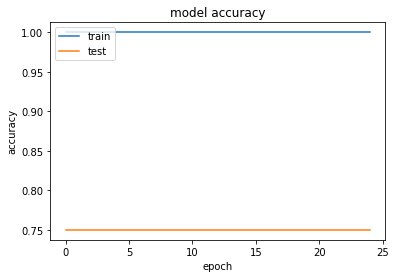

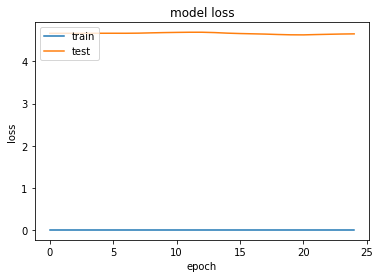

In [30]:
import matplotlib.pyplot as plt
print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=5)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

   adventure       1.00      0.50      0.67         2
       naked       1.00      1.00      1.00         2
       sport       0.00      0.00      0.00         0

    accuracy                           0.75         4
   macro avg       0.67      0.50      0.56         4
weighted avg       1.00      0.75      0.83         4



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
